In [3]:
# Import libraries
from bs4 import BeautifulSoup
import requests
import time
import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Defining a method for scraping the web page
def scrape_perfume_data(url):
    headers = {
        "User-Agent": "Insert your user agent"
    }
    page = requests.get(url, headers=headers)
    page.raise_for_status()
    soup = BeautifulSoup(page.content, 'html.parser')
    
    perfume_name = brand_name = release_year = overall_rating = rating_count = perfumer = scent_rating = longevity_rating = sillage_rating = bottle_rating = value_rating = scraping_date = None
    
    try:
        perfume_name = soup.find('h1', class_='p_name_h1', itemprop='name').get_text().strip().split('\n')[0].strip()
    except AttributeError:
        pass
    
    try:
        brand_span = soup.find('span', itemprop='brand')
        brand_name = brand_span.find('span', itemprop='name').get_text().strip()
    except AttributeError:
        pass
    
    try:
        year = soup.find('a', href=lambda href: href and 'Release_Years' in href)
        release_year = year.get_text().strip()
    except AttributeError:
        pass
    
    try:
        overall_rating = soup.find('span', itemprop='ratingValue').get_text().strip()
    except AttributeError:
        pass
    
    try:
        rating_count = soup.find('span', itemprop='ratingCount').get_text().strip()
    except AttributeError:
        pass
    
    try:
        perfumer = soup.find('div', {'class': 'w-100 mt-0-5 mb-3'}).get_text().strip()
    except AttributeError:
        pass
    
    try:
        top_notes = soup.find('div', class_='pyramid_block nb_t w-100 mt-2')
        top_note_list = [span.get_text(strip=True) for span in top_notes.find_all('span', class_='clickable_note_img')]
    except AttributeError:
        pass
    
    try:
        heart_notes = soup.find('div', class_='pyramid_block nb_m w-100 mt-2')
        heart_note_list = [span.get_text(strip=True) for span in heart_notes.find_all('span', class_='clickable_note_img')]
    except AttributeError:
        pass
    
    try:
        base_notes = soup.find('div', class_='pyramid_block nb_b w-100 mt-2')
        base_note_list = [span.get_text(strip=True) for span in base_notes.find_all('span', class_='clickable_note_img')]
    except AttributeError:
        pass
    
    try:
        scent_rating = soup.find('span', class_='pr-1 text-lg bold blue').get_text().strip()
    except AttributeError:
        pass
    
    try:
        longevity_rating = soup.find('span', class_='pr-1 text-lg bold pink').get_text().strip()
    except AttributeError:
        pass
    
    try:
        sillage_rating = soup.find('span', class_='pr-1 text-lg bold purple').get_text().strip()
    except AttributeError:
        pass
    
    try:
        bottle_rating = soup.find('span', class_='pr-1 text-lg bold green').get_text().strip()
    except AttributeError:
        pass
    
    try:
        value_rating = soup.find('span', class_='pr-1 text-lg bold grey').get_text().strip()
    except AttributeError:
        pass
    
    scraping_date = datetime.date.today()
    
    return {
        'PerfumeName': perfume_name, 
        'Brand': brand_name, 
        'ReleaseYear': release_year, 
        'OverallRating': overall_rating, 
        'RatingCount': rating_count, 
        'Perfumer': perfumer, 
        'TopNotes': top_note_list if 'top_note_list' in locals() else None, 
        'HeartNotes': heart_note_list if 'heart_note_list' in locals() else None, 
        'BaseNotes': base_note_list if 'base_note_list' in locals() else None, 
        'ScentRating': scent_rating, 
        'LongevityRating': longevity_rating, 
        'SillageRating': sillage_rating, 
        'BottleRating': bottle_rating, 
        'ValueRating': value_rating, 
        'ScrapingDate': scraping_date
    }

In [5]:
# Uploading the page that contains a directory of all newly added perfumes

url_search = 'https://www.parfumo.com/Recently_added?current_page=1&'
headers = {"User-Agent": "Insert your user agent"}
page = requests.get(url_search, headers = headers)
page.raise_for_status()
soup3 = BeautifulSoup(page.content, 'html.parser')
perfumes = soup3.find_all('div', class_='name')

In [9]:
# Defining a method for collecting the urls we want to scrape

def scrape_perfume_links(url):
    headers = {
        "User-Agent": "Insert your user agent",
        "Referer": "https://www.parfumo.com/",
        "Accept-Language": "en-US,en;q=0.9"
    }
    session = requests.Session()
    page = session.get(url, headers=headers)
    page.raise_for_status()
    soup3 = BeautifulSoup(page.content, 'html.parser')
    
    perfumes = soup3.find_all('div', class_='name')
    perfume_links = []
    for perfume in perfumes:
        link = perfume.find('a')['href']
        perfume_links.append(link)

    return perfume_links

In [10]:
# This method should parse through every page within the new release directory (theres a total of 50 of them)

def scrape_all_pages(base_url, total_pages):
    all_links = []
    base_url = 'https://www.parfumo.com/Recently_added?current_page='
    end_url = '&'
    total_pages = 50

    for page_number in range(1, total_pages + 1):
        page_url = f"{base_url}{page_number}{end_url}"
        try:
            links_on_page = scrape_perfume_links(page_url)
            all_links.extend(links_on_page)
            print(f"Scraped links from page {page_number}")
        except requests.HTTPError as e:
            print(f"Error scraping page {page_number}: {e}")
        time.sleep(1)
    return all_links


In [12]:
# Collecting the urls we want to scrape

perfume_links = scrape_all_pages('https://www.parfumo.com/Recently_added?current_page=', 50)

print(perfume_links)

Scraped links from page 1
Scraped links from page 2
Scraped links from page 3
Scraped links from page 4
Scraped links from page 5
Scraped links from page 6
Scraped links from page 7
Scraped links from page 8
Scraped links from page 9
Scraped links from page 10
Scraped links from page 11
Scraped links from page 12
Scraped links from page 13
Scraped links from page 14
Scraped links from page 15
Scraped links from page 16
Scraped links from page 17
Scraped links from page 18
Scraped links from page 19
Scraped links from page 20
Scraped links from page 21
Scraped links from page 22
Scraped links from page 23
Scraped links from page 24
Scraped links from page 25
Scraped links from page 26
Scraped links from page 27
Scraped links from page 28
Scraped links from page 29
Scraped links from page 30
Scraped links from page 31
Scraped links from page 32
Scraped links from page 33
Scraped links from page 34
Scraped links from page 35
Scraped links from page 36
Scraped links from page 37
Scraped li

In [14]:
print(perfume_links)

['https://www.parfumo.com/Perfumes/Panama_1924/panama-1924-eau-de-parfum', 'https://www.parfumo.com/Perfumes/Pigmentarium/azabache-chapter-2', 'https://www.parfumo.com/Perfumes/louzan/fashion-oud', 'https://www.parfumo.com/Perfumes/Michael_Kors/michael-kors-pour-femme', 'https://www.parfumo.com/Perfumes/Michael_Kors/michael-kors-pour-homme', 'https://www.parfumo.com/Perfumes/mugler/angel-fantasm', 'https://www.parfumo.com/Perfumes/Giorgio_Armani/acqua-di-gioia-eau-de-parfum-intense', 'https://www.parfumo.com/Perfumes/neferlogne/make-a-toast', 'https://www.parfumo.com/Perfumes/Avon/today-tomorrow-always-everlasting', 'https://www.parfumo.com/Perfumes/Cartier/oud-santal-limited-edition-2024', 'https://www.parfumo.com/Perfumes/Sucreabeille/sparkling-peach-perfume-oil', 'https://www.parfumo.com/Perfumes/Sucreabeille/sparkling-peach-eau-de-parfum', 'https://www.parfumo.com/Perfumes/Jean_Charles_Brosseau/ombre-musquee', 'https://www.parfumo.com/Perfumes/Avon/lov-u-connected', 'https://www.pa

In [16]:
# Collecting the data from URLs we have gathered

all_perfume_data = []

for link in perfume_links:
    print('Scraping link:', link)
    try:
        perfume_data_new = scrape_perfume_data(link)
        all_perfume_data.append(perfume_data_new)
        print(f'Data scraped successfully for {perfume_data_new["PerfumeName"]}')
    except Exception as e:
        print(f'Error scraping data for {link}: {e}')

Scraping link: https://www.parfumo.com/Perfumes/Panama_1924/panama-1924-eau-de-parfum
Data scraped successfully for Panama 1924 Panama 1924 Eau de Parfum
Scraping link: https://www.parfumo.com/Perfumes/Pigmentarium/azabache-chapter-2
Data scraped successfully for Azabache Chapter 2 Pigmentarium 2024
Scraping link: https://www.parfumo.com/Perfumes/louzan/fashion-oud
Data scraped successfully for Fashion Oud Louzan / لوزان
Scraping link: https://www.parfumo.com/Perfumes/Michael_Kors/michael-kors-pour-femme
Data scraped successfully for Michael Kors pour Femme Michael Kors 2024
Scraping link: https://www.parfumo.com/Perfumes/Michael_Kors/michael-kors-pour-homme
Data scraped successfully for Michael Kors pour Homme Michael Kors 2024
Scraping link: https://www.parfumo.com/Perfumes/mugler/angel-fantasm
Data scraped successfully for Angel Fantasm Mugler 2024
Scraping link: https://www.parfumo.com/Perfumes/Giorgio_Armani/acqua-di-gioia-eau-de-parfum-intense
Data scraped successfully for Acqua 

Data scraped successfully for Psycho Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/pumpkin-cheesecake
Data scraped successfully for Pumpkin Cheesecake Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/pumpkin-spice-latte
Data scraped successfully for Pumpkin Spice Latte Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/purgatorio
Data scraped successfully for Purgatorio Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/queen-of-the-damned
Data scraped successfully for Queen of the Damned Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/proserpine
Data scraped successfully for Proserpine Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/seven-secrets/secret-love-solid-perfume
Data scraped successfully for Secret Love Seven Secrets 2021 Solid Perfume
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/potatoes-and-molasses
Data scraped successfully for Pota

Data scraped successfully for Shanghai Club Fleurage Perfume Atelier
Scraping link: https://www.parfumo.com/Perfumes/Fleurage_Perfume_Atelier/istanbul-caravan
Data scraped successfully for Istanbul Caravan Fleurage Perfume Atelier
Scraping link: https://www.parfumo.com/Perfumes/kai-porten-parfums-prives/cherry-x
Data scraped successfully for Cherry X Kai Porten Parfums Privés 2024
Scraping link: https://www.parfumo.com/Perfumes/Elizabeth_Arden/5th-avenue-nyc-dream
Data scraped successfully for 5th Avenue NYC Dream Elizabeth Arden 2024
Scraping link: https://www.parfumo.com/Perfumes/seven-secrets/confetti-solid-perfume
Data scraped successfully for Confetti Seven Secrets 2021 Solid Perfume
Scraping link: https://www.parfumo.com/Perfumes/California_Perfume_Company/eau-de-cologne
Data scraped successfully for Eau de Cologne California Perfume Company
Scraping link: https://www.parfumo.com/Perfumes/California_Perfume_Company/bay-rum
Data scraped successfully for Bay Rum California Perfume 

Data scraped successfully for Maracoca for Women Amaffi
Scraping link: https://www.parfumo.com/Perfumes/Fragonard/baiser-d-aurore-eau-de-toilette
Data scraped successfully for Baiser d'Aurore Fragonard Eau de Toilette
Scraping link: https://www.parfumo.com/Perfumes/Sucreabeille/showstopper-perfume-oil
Data scraped successfully for Showstopper Sucreabeille Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/Sucreabeille/showstopper-eau-de-parfum
Data scraped successfully for Showstopper Sucreabeille Eau de Parfum
Scraping link: https://www.parfumo.com/Perfumes/Dior/miss-dior-blooming-bouquet-2023-parfum-solide
Data scraped successfully for Miss Dior Blooming Bouquet Dior 2023 Parfum Solide
Scraping link: https://www.parfumo.com/Perfumes/smelly-yeti/mustard
Data scraped successfully for Mustard Smelly Yeti
Scraping link: https://www.parfumo.com/Perfumes/4711/sparkling-island-body-splash
Data scraped successfully for Sparkling Island 4711 2024 Body Splash
Scraping link: https://ww

Data scraped successfully for Kissing Flowers Douglas 2024
Scraping link: https://www.parfumo.com/Perfumes/Douglas/flirting-in-eden
Data scraped successfully for Flirting in Eden Douglas 2024
Scraping link: https://www.parfumo.com/Perfumes/Sixteen92/neitherworld-perfume-oil
Data scraped successfully for Neitherworld Sixteen92 2024 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/Sixteen92/never-trust-the-living-2024-extrait-de-parfum
Data scraped successfully for Never Trust the Living Sixteen92 2024 Extrait de Parfum
Scraping link: https://www.parfumo.com/Perfumes/Acqua_di_Portofino/borgo-eau-de-parfum
Data scraped successfully for Borgo Acqua di Portofino Eau de Parfum
Scraping link: https://www.parfumo.com/Perfumes/Acqua_di_Portofino/notte-eau-de-parfum
Data scraped successfully for Notte Acqua di Portofino Eau de Parfum
Scraping link: https://www.parfumo.com/Perfumes/Acqua_di_Portofino/369
Data scraped successfully for 369 Acqua di Portofino
Scraping link: https://www.pa

Data scraped successfully for 315 Prestige Pink La Rive
Scraping link: https://www.parfumo.com/Perfumes/wadha/white-light
Data scraped successfully for White Light Wadha
Scraping link: https://www.parfumo.com/Perfumes/liur/34
Data scraped successfully for 34 Liur. 2024
Scraping link: https://www.parfumo.com/Perfumes/Sapil/maison-de-bois
Data scraped successfully for Maison de Bois Sapil
Scraping link: https://www.parfumo.com/Perfumes/Taif_Al_Emarat/golden-oud
Data scraped successfully for Golden Oud Taif Al-Emarat / طيف الإمارات 2024
Scraping link: https://www.parfumo.com/Perfumes/Marks_Spencer/warm-neroli
Data scraped successfully for Warm Neroli Marks & Spencer
Scraping link: https://www.parfumo.com/Perfumes/Afnan_Perfumes/cherry-bouquet
Data scraped successfully for Cherry Bouquet Afnan Perfumes 2024
Scraping link: https://www.parfumo.com/Perfumes/Berdoues/monoi-coco
Data scraped successfully for Monoï & Coco Berdoues 2024
Scraping link: https://www.parfumo.com/Perfumes/Sapil/maison

Data scraped successfully for Chocolate Queen Navitus Parfums 2024 All Over Spray
Scraping link: https://www.parfumo.com/Perfumes/navitus-parfums/ambrosia-imperiale-all-over-spray
Data scraped successfully for Ambrosia Imperiale Navitus Parfums 2024 All Over Spray
Scraping link: https://www.parfumo.com/Perfumes/navitus-parfums/nuit-royale-all-over-spray
Data scraped successfully for Nuit Royale Navitus Parfums 2024 All Over Spray
Scraping link: https://www.parfumo.com/Perfumes/Fragonard/l-air-de-grasse
Data scraped successfully for L'air de Grasse Fragonard
Scraping link: https://www.parfumo.com/Perfumes/Sapil/desire
Data scraped successfully for Desire Sapil
Scraping link: https://www.parfumo.com/Perfumes/Sapil/maison-de-rose
Data scraped successfully for Maison de Rose Sapil
Scraping link: https://www.parfumo.com/Perfumes/Sapil/rouge
Data scraped successfully for Rouge Sapil
Scraping link: https://www.parfumo.com/Perfumes/Sapil/joy
Data scraped successfully for Joy Sapil
Scraping lin

Data scraped successfully for Ghost With the Most Sixteen92 2024 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/miyaz-perfume/rose-emir
Data scraped successfully for Rose Emir Miyaz Perfume 2024
Scraping link: https://www.parfumo.com/Perfumes/maksim-perfume/cafe-mystique
Data scraped successfully for Café Mystique Maksim Perfume 2024
Scraping link: https://www.parfumo.com/Perfumes/maksim-perfume/musk-couture
Data scraped successfully for Musk Couture Maksim Perfume 2024
Scraping link: https://www.parfumo.com/Perfumes/maksim-perfume/amber-balsam
Data scraped successfully for Amber Balsam Maksim Perfume 2024
Scraping link: https://www.parfumo.com/Perfumes/Fantome/luna-di-miele
Data scraped successfully for Luna di Miele Fantôme
Scraping link: https://www.parfumo.com/Perfumes/Auphorie/qinglong
Data scraped successfully for Qinglong Auphorie 2024
Scraping link: https://www.parfumo.com/Perfumes/boy-smells/crush
Data scraped successfully for Crush Boy Smells 2024
Scraping link: 

Data scraped successfully for Swan Dive Sucreabeille Eau de Parfum
Scraping link: https://www.parfumo.com/Perfumes/mesoud/toros
Data scraped successfully for Toros mesOud
Scraping link: https://www.parfumo.com/Perfumes/pictura-fragrans/quetzalcoatl
Data scraped successfully for Quetzalcoatl Pictura Fragrans
Scraping link: https://www.parfumo.com/Perfumes/Sucreabeille/arboreal-perfume-oil
Data scraped successfully for Arboreal Sucreabeille Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/Sucreabeille/arboreal-eau-de-parfum
Data scraped successfully for Arboreal Sucreabeille Eau de Parfum
Scraping link: https://www.parfumo.com/Perfumes/Sixteen92/the-hidden-folk-perfume-oil
Data scraped successfully for The Hidden Folk Sixteen92 2021 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/Sixteen92/monoceros-extrait-de-parfum
Data scraped successfully for Monoceros Sixteen92 2021 Extrait de Parfum
Scraping link: https://www.parfumo.com/Perfumes/pictura-fragrans/solar-wind
D

Data scraped successfully for Hellebore Mellifluence Perfume 2024
Scraping link: https://www.parfumo.com/Perfumes/Loewe/paula-s-ibiza-cosmic
Data scraped successfully for Paula's Ibiza Cosmic Loewe 2024
Scraping link: https://www.parfumo.com/Perfumes/Granado/gardenia
Data scraped successfully for Gardênia Granado 2023
Scraping link: https://www.parfumo.com/Perfumes/Fleurage_Perfume_Atelier/thai-orchid
Data scraped successfully for Thai Orchid Fleurage Perfume Atelier
Scraping link: https://www.parfumo.com/Perfumes/dossier/oud-rose-on-fire
Data scraped successfully for Oud & Rose on Fire Dossier 2024
Scraping link: https://www.parfumo.com/Perfumes/dossier/orchid-sandalwood-at-dusk
Data scraped successfully for Orchid & Sandalwood at Dusk Dossier 2024
Scraping link: https://www.parfumo.com/Perfumes/hosanna-aroma/song-of-songs
Data scraped successfully for Song of Songs Hosanna Aroma
Scraping link: https://www.parfumo.com/Perfumes/ahres/my-anarchism
Data scraped successfully for #My Anarc

Data scraped successfully for Marché Ultime Gloss Moderne Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/Fleurage_Perfume_Atelier/pan
Data scraped successfully for Pan Fleurage Perfume Atelier
Scraping link: https://www.parfumo.com/Perfumes/mesoud/mitti-attar
Data scraped successfully for Mitti Attar mesOud
Scraping link: https://www.parfumo.com/Perfumes/D_S__Durga/cowgirl-grass-2024
Data scraped successfully for Cowgirl Grass D.S. & Durga 2024
Scraping link: https://www.parfumo.com/Perfumes/peach-plie/usagi
Data scraped successfully for Usagi Peach Plié
Scraping link: https://www.parfumo.com/Perfumes/ahres/zero-solid-perfume
Data scraped successfully for #Zero #ゼロ Ahres / アーレス 2024 Solid Perfume
Scraping link: https://www.parfumo.com/Perfumes/skinnydip-london/just-peachy-body-mist
Data scraped successfully for Just Peachy Skinnydip London Body Mist
Scraping link: https://www.parfumo.com/Perfumes/habzoud/maroke-qadeem
Data scraped successfully for Maroke Qadeem Habzoud 202

Data scraped successfully for American Ideal California Perfume Company Toilet Water
Scraping link: https://www.parfumo.com/Perfumes/Dumont/celerio-oros
Data scraped successfully for Celerio Oros Dumont
Scraping link: https://www.parfumo.com/Perfumes/Dumont/celerio-elysium
Data scraped successfully for Celerio Elysium Dumont
Scraping link: https://www.parfumo.com/Perfumes/Dumont/axon-ultimate
Data scraped successfully for Axon Ultimate Dumont
Scraping link: https://www.parfumo.com/Perfumes/Dumont/celerio-epic
Data scraped successfully for Celerio Epic Dumont
Scraping link: https://www.parfumo.com/Perfumes/Histoires_de_Parfums/this-is-not-a-blue-bottle-1-7-ceci-n-est-pas-un-flacon-bleu-1-7
Data scraped successfully for This is not a Blue Bottle 1.7 Ceci n'est pas un Flacon Bleu 1.7 Histoires de Parfums 2024
Scraping link: https://www.parfumo.com/Perfumes/Axe/blue-lavender
Data scraped successfully for Blue Lavender Axe / Lynx
Scraping link: https://www.parfumo.com/Perfumes/little-and-gr

Data scraped successfully for Sultry It Makes Perfect Scents
Scraping link: https://www.parfumo.com/Perfumes/Luxury_Concept_Perfumes/seduire
Data scraped successfully for Seduire Luxury Concept Perfumes
Scraping link: https://www.parfumo.com/Perfumes/Orens_Parfums/silenda-d-ecume-body-mist
Data scraped successfully for Silenda d'Ecume Orens Parfums Body Mist
Scraping link: https://www.parfumo.com/Perfumes/Orens_Parfums/moire-de-kalha-body-mist
Data scraped successfully for Moiré de Kalha Orens Parfums Body Mist
Scraping link: https://www.parfumo.com/Perfumes/Orens_Parfums/callis-subtile-body-mist
Data scraped successfully for Callis Subtile Orens Parfums Body Mist
Scraping link: https://www.parfumo.com/Perfumes/Orens_Parfums/silenda-d-ecume-hair-mist
Data scraped successfully for Silenda d'Ecume Orens Parfums Hair Mist
Scraping link: https://www.parfumo.com/Perfumes/Orens_Parfums/moire-de-kalha-hair-mist
Data scraped successfully for Moiré de Kalha Orens Parfums Hair Mist
Scraping link

Data scraped successfully for Green Geranium Axe / Lynx
Scraping link: https://www.parfumo.com/Perfumes/Axe/aqua-bergamot
Data scraped successfully for Aqua Bergamot Axe / Lynx
Scraping link: https://www.parfumo.com/Perfumes/Nicole_Miller/radiant-aura
Data scraped successfully for Radiant Aura Nicole Miller
Scraping link: https://www.parfumo.com/Perfumes/lurker-strange/perseus-andromeda
Data scraped successfully for Perseus & Andromeda Lurker & Strange 2024
Scraping link: https://www.parfumo.com/Perfumes/Avon/unforgettable-cream-perfume
Data scraped successfully for Unforgettable Avon Cream Perfume
Scraping link: https://www.parfumo.com/Perfumes/Reyane_Tradition/r2b2-interstellar
Data scraped successfully for R2B2 Interstellar Reyane Tradition
Scraping link: https://www.parfumo.com/Perfumes/imperial-parfums/nuit-imperial
Data scraped successfully for Nuit Imperial Imperial Parfums
Scraping link: https://www.parfumo.com/Perfumes/Anthropologie/our-song
Data scraped successfully for Our S

Data scraped successfully for Brilliance Mandarine Sentir 2023
Scraping link: https://www.parfumo.com/Perfumes/curatrix/foreshadow
Data scraped successfully for Foreshadow Curatrix
Scraping link: https://www.parfumo.com/Perfumes/curatrix/antihero
Data scraped successfully for Antihero Curatrix
Scraping link: https://www.parfumo.com/Perfumes/curatrix/fatale
Data scraped successfully for Fatale Curatrix
Scraping link: https://www.parfumo.com/Perfumes/Avon/hanagasa-perfume
Data scraped successfully for Hanagasa Avon Perfume
Scraping link: https://www.parfumo.com/Perfumes/sentir/cedre-doux
Data scraped successfully for Cèdre Doux Sentir 2023
Scraping link: https://www.parfumo.com/Perfumes/sentir/ambre-brule
Data scraped successfully for Ambre Brûlé Sentir 2023
Scraping link: https://www.parfumo.com/Perfumes/sentir/aplomb
Data scraped successfully for Aplomb Sentir 2023
Scraping link: https://www.parfumo.com/Perfumes/sentir/bombe-de-mimosa
Data scraped successfully for Bombe de Mimosa Senti

Data scraped successfully for Oatmeal Cream Pie The Strange South 2022 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/The_Strange_South/follow-the-crows-perfume-oil
Data scraped successfully for Follow the Crows The Strange South 2021 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/The_Strange_South/land-of-a-thousand-fables-perfume-oil
Data scraped successfully for Land of a Thousand Fables The Strange South 2021 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/The_Strange_South/scenes-from-a-marriage-perfume-oil
Data scraped successfully for Scenes from a Marriage The Strange South 2021 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/The_Strange_South/queen-of-the-night-perfume-oil
Data scraped successfully for Queen of the Night The Strange South 2022 Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/The_Strange_South/a-fine-gentleman-perfume-oil
Data scraped successfully for A Fine Gentleman The Strange South 2020 Perfume Oi

Data scraped successfully for Halcyon Oud Soma Parfums 2024
Scraping link: https://www.parfumo.com/Perfumes/wild-veil-perfume/coal-oil-point-solid-perfume
Data scraped successfully for Coal Oil Point Wild Veil Perfume 2024 Solid Perfume
Scraping link: https://www.parfumo.com/Perfumes/Honore_Payan/no-19
Data scraped successfully for Nº 19 Honoré Payan
Scraping link: https://www.parfumo.com/Perfumes/Amberfig/l-oud
Data scraped successfully for L'Oud Amberfig 2024
Scraping link: https://www.parfumo.com/Perfumes/soma-parfums/virde-redux
Data scraped successfully for Virde Redux Soma Parfums 2023
Scraping link: https://www.parfumo.com/Perfumes/taberna-odores-magicus/garnet
Data scraped successfully for Garnet Гранат Taberna Odores Magicus
Scraping link: https://www.parfumo.com/Perfumes/Adopt/souffle-de-jasmin
Data scraped successfully for Souffle de Jasmin Adopt' / Réserve Naturelle
Scraping link: https://www.parfumo.com/Perfumes/Molinard/iris
Data scraped successfully for Iris Molinard 202

Data scraped successfully for Big Dreams bodycology 2024
Scraping link: https://www.parfumo.com/Perfumes/gloss-moderne/universelle-hair-mist
Data scraped successfully for Universelle Gloss Moderne Hair Mist
Scraping link: https://www.parfumo.com/Perfumes/gloss-moderne/universelle-body-mist
Data scraped successfully for Universelle Gloss Moderne Body Mist
Scraping link: https://www.parfumo.com/Perfumes/gloss-moderne/universelle-parfum
Data scraped successfully for Universelle Gloss Moderne Parfum
Scraping link: https://www.parfumo.com/Perfumes/gloss-moderne/universelle-eau-de-toilette
Data scraped successfully for Universelle Gloss Moderne Eau de Toilette
Scraping link: https://www.parfumo.com/Perfumes/gloss-moderne/universelle-perfume-oil
Data scraped successfully for Universelle Gloss Moderne Perfume Oil
Scraping link: https://www.parfumo.com/Perfumes/mesoud/sarawak-ateeq
Data scraped successfully for Sarawak Ateeq mesOud
Scraping link: https://www.parfumo.com/Perfumes/mesoud/sumbawa-

In [17]:
print(all_perfume_data)

[{'PerfumeName': 'Panama 1924 Panama 1924 Eau de Parfum', 'Brand': 'Panama 1924', 'ReleaseYear': None, 'OverallRating': None, 'RatingCount': None, 'Perfumer': None, 'TopNotes': ['Lavender', 'Lemon', 'Mandarin orange', 'Mint'], 'HeartNotes': ['Cumin', 'Red thyme', 'Russian coriander', 'Ceylon cinnamon', 'Rose'], 'BaseNotes': ['Sandalwood'], 'ScentRating': None, 'LongevityRating': None, 'SillageRating': None, 'BottleRating': None, 'ValueRating': None, 'ScrapingDate': datetime.date(2024, 4, 13)}, {'PerfumeName': 'Azabache Chapter 2 Pigmentarium 2024', 'Brand': 'Pigmentarium', 'ReleaseYear': '2024', 'OverallRating': None, 'RatingCount': None, 'Perfumer': None, 'TopNotes': ['Bergamot', 'Geranium', 'Pink pepper'], 'HeartNotes': ['Jasmine', 'Lily of the valley', 'Rose', 'Vervain'], 'BaseNotes': ['Amber', 'Cedarwood', 'Frankincense', 'Labdanum', 'Musk', 'Myrrh', 'Vetiver'], 'ScentRating': None, 'LongevityRating': None, 'SillageRating': None, 'BottleRating': None, 'ValueRating': None, 'Scraping

In [18]:
# Setting up the CSV file for storing  the data

csv_file = 'perfume_data.csv'
fieldnames = all_perfume_data[0].keys()

In [19]:
# Saving the data to the CSV file

with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for data in all_perfume_data:
        writer.writerow(data)

print("Data saved to:", csv_file)

Data saved to: perfume_data.csv


In [4]:
df = pd.read_csv('../Proj 3 - Web scraping/perfume_data.csv')

In [5]:
# Clearing the columns we won't be using

columns_to_drop = ['OverallRating', 'RatingCount', 'ScentRating', 'LongevityRating', 'SillageRating', 'BottleRating', 'ValueRating']  # List of column names to drop
df.drop(columns = columns_to_drop, inplace = True)

In [6]:
# Filtering out null values
df.dropna(subset = ['TopNotes'], inplace = True)

In [7]:
# Checking for null values in the df
df.isnull().sum()

PerfumeName       0
Brand             0
ReleaseYear     224
Perfumer        386
TopNotes          0
HeartNotes        0
BaseNotes         0
ScrapingDate      0
dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of                                      PerfumeName           Brand  ReleaseYear  \
0          Panama 1924 Panama 1924 Eau de Parfum     Panama 1924          NaN   
1           Azabache Chapter 2 Pigmentarium 2024    Pigmentarium       2024.0   
2                     Fashion Oud Louzan / لوزان  Louzan / لوزان          NaN   
3      Michael Kors pour Femme Michael Kors 2024    Michael Kors       2024.0   
4      Michael Kors pour Homme Michael Kors 2024    Michael Kors       2024.0   
..                                           ...             ...          ...   
990        Universelle Gloss Moderne Perfume Oil   Gloss Moderne          NaN   
995  N° 18 de HJ Henry Jacques Extrait de Parfum   Henry Jacques          NaN   
996         1995 Henry Jacques Extrait de Parfum   Henry Jacques          NaN   
997         Cuba Henry Jacques Extrait de Parfum   Henry Jacques          NaN   
998                    Love Letter Flonérch 2022        Flonérch       2022

In [35]:
df.head()

,PerfumeName,Brand,ReleaseYear,Perfumer,TopNotes,HeartNotes,BaseNotes,ScrapingDate
0,Panama 1924 Panama 1924 Eau de Parfum,Panama 1924,2024.0,NaN,"['Lavender', 'Lemon', 'Mandarin orange', 'Mint']","['Cumin', 'Red thyme', 'Russian coriander', 'C...",['Sandalwood'],2024-04-13
1,Azabache Chapter 2 Pigmentarium 2024,Pigmentarium,2024.0,NaN,"['Bergamot', 'Geranium', 'Pink pepper']","['Jasmine', 'Lily of the valley', 'Rose', 'Ver...","['Amber', 'Cedarwood', 'Frankincense', 'Labdan...",2024-04-13
2,Fashion Oud Louzan / لوزان,Louzan / لوزان,2024.0,NaN,['Saffron'],['Jasmine'],"['Indian oud', 'Tobacco']",2024-04-13
3,Michael Kors pour Femme Michael Kors 2024,Michael Kors,2024.0,NaN,"['Blackcurrant', 'Mandarin orange', 'Pink pepp...","['Jasmine', 'Rose']","['Musk', 'Patchouli', 'Vanilla']",2024-04-13
4,Michael Kors pour Homme Michael Kors 2024,Michael Kors,2024.0,NaN,"['Bergamot', 'Lavender', 'Pink pepper']","['Geranium', 'Sage', 'Seawater']","['Ambergris', 'Patchouli', 'Vetiver']",2024-04-13


In [36]:
df.dtypes

PerfumeName      object
Brand            object
ReleaseYear     float64
Perfumer         object
TopNotes         object
HeartNotes       object
BaseNotes        object
ScrapingDate     object
dtype: object

In [123]:
# Iterating over rows and counting the occurrences of ingredients listed in the 'TopNotes' column 
top_ingredient_counts = {}

for index, row in df.iterrows():
    top_notes_list = row['TopNotes']
    if isinstance(top_notes_list, list):
        for ingredient in top_notes_list:
            top_ingredient_counts[ingredient] = top_ingredient_counts.get(ingredient, 0) + 1
    elif isinstance(top_notes_list, str):
        ingredients = [x.strip() for x in top_notes_list.split(',')]
        for ingredient in ingredients:
            top_ingredient_counts[ingredient] = top_ingredient_counts.get(ingredient, 0) + 1
top_ingredient_series = pd.Series(top_ingredient_counts, dtype=int)
print(top_ingredient_series)

['Lavender'                    5
'Lemon'                       33
'Mandarin orange'             34
'Mint']                        1
['Bergamot'                  134
                            ... 
['African orange blossom'      1
'Vervain']                     1
'Sea salt']                    5
['Nasturtium'                  1
'Provençal herbs']             1
Length: 495, dtype: int32


In [124]:
# Cleaning the index values and aggregating the counts of ingredients

top_ingredient_counts = {}

for ingredient, count in top_ingredient_series_sorted.items():
    top_ingredient_cleaned = ingredient.replace('[', '').replace(']', '').replace("'", "")
    if top_ingredient_cleaned in top_ingredient_counts:
        top_ingredient_counts[top_ingredient_cleaned] += count
    else:
        top_ingredient_counts[top_ingredient_cleaned] = count
top_ingredient_series_cleaned = pd.Series(top_ingredient_counts, dtype = int)
print(top_ingredient_series_cleaned)

Bergamot           167
Mandarin orange     69
Pink pepper         51
Lemon               63
Grapefruit          42
                  ... 
Snow                 1
Ice cream            1
Matcha               1
Peanut               1
Citrus zest          1
Length: 330, dtype: int32


In [127]:
# Sorting the Series in descending order based on values
top_ingredient_series_sorted = top_ingredient_series_cleaned.sort_values(ascending=True)
print(top_ingredient_series_sorted)

Sicilian bergamot        1
Candied orange           1
Turkish galbanum         1
Red mandarin orange      1
Swiss stone pine         1
                      ... 
Grapefruit              42
Pink pepper             51
Lemon                   63
Mandarin orange         69
Bergamot               167
Length: 330, dtype: int32


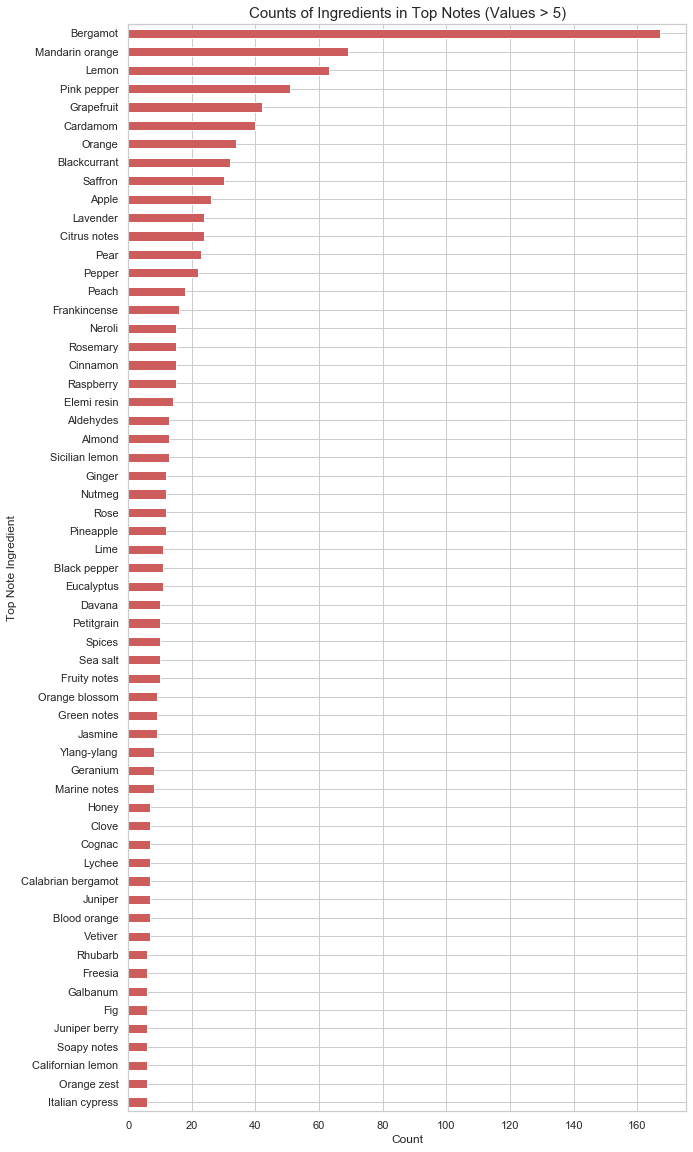

In [154]:
top_ingredient_series_filtered = top_ingredient_series_sorted[top_ingredient_series_sorted > 5]

# Plotting the filtered values in a horizontal bar chart
top_ingredient_series_filtered.plot(kind = 'barh', figsize = (10, 20), color = 'indianred')
plt.xlabel('Count')
plt.ylabel('Top Note Ingredient')
plt.title('Counts of Ingredients in Top Notes (Values > 5)', fontsize = 15)
plt.show()

In [119]:
# Iterating over rows and counting the occurrences of ingredients listed in the 'HeartNotes' column 
heart_ingredient_counts = {}

for index, row in df.iterrows():
    heart_notes_list = row['HeartNotes']
    if isinstance(heart_notes_list, list):
        for ingredient in heart_notes_list:
            heart_ingredient_counts[ingredient] = heart_ingredient_counts.get(ingredient, 0) + 1
    elif isinstance(heart_notes_list, str):
        ingredients = [x.strip() for x in heart_notes_list.split(',')]
        for ingredient in ingredients:
            heart_ingredient_counts[ingredient] = heart_ingredient_counts.get(ingredient, 0) + 1

heart_ingredient_series = pd.Series(heart_ingredient_counts, dtype=int)
print(heart_ingredient_series)

['Cumin'                1
'Red thyme'             1
'Russian coriander'     1
'Ceylon cinnamon'       1
'Rose']                82
                       ..
'Fruits'                5
'Reseda']               1
'Fir balsam'            1
'Juniper berry']        1
['Cherry blossom'       1
Length: 594, dtype: int32


In [134]:
# Cleaning the index values and aggregating the counts of ingredients
heart_ingredient_counts = {}

for ingredient, count in heart_ingredient_series.items():
    ingredient_cleaned = ingredient.replace('[', '').replace(']', '').replace("'", "")
    if ingredient_cleaned in heart_ingredient_counts:
        heart_ingredient_counts[ingredient_cleaned] += count
    else:
        heart_ingredient_counts[ingredient_cleaned] = count

heart_ingredient_series_cleaned = pd.Series(heart_ingredient_counts, dtype=int)
print(heart_ingredient_series_cleaned)

Cumin                  3
Red thyme              1
Russian coriander      1
Ceylon cinnamon        2
Rose                 128
                    ... 
Dew drop               5
Fruits                 5
Reseda                 1
Fir balsam             1
Juniper berry          1
Length: 420, dtype: int32


In [135]:
# Sort the Series in descending order based on values
heart_ingredient_series_sorted = heart_ingredient_series_cleaned.sort_values(ascending=True)
print(heart_ingredient_series_sorted)

Juniper berry           1
Peru balsam             1
Fresh notes             1
English oak wood        1
Powdery notes           1
                     ... 
Lily of the valley     47
Iris                   47
Geranium               49
Jasmine               119
Rose                  128
Length: 420, dtype: int32


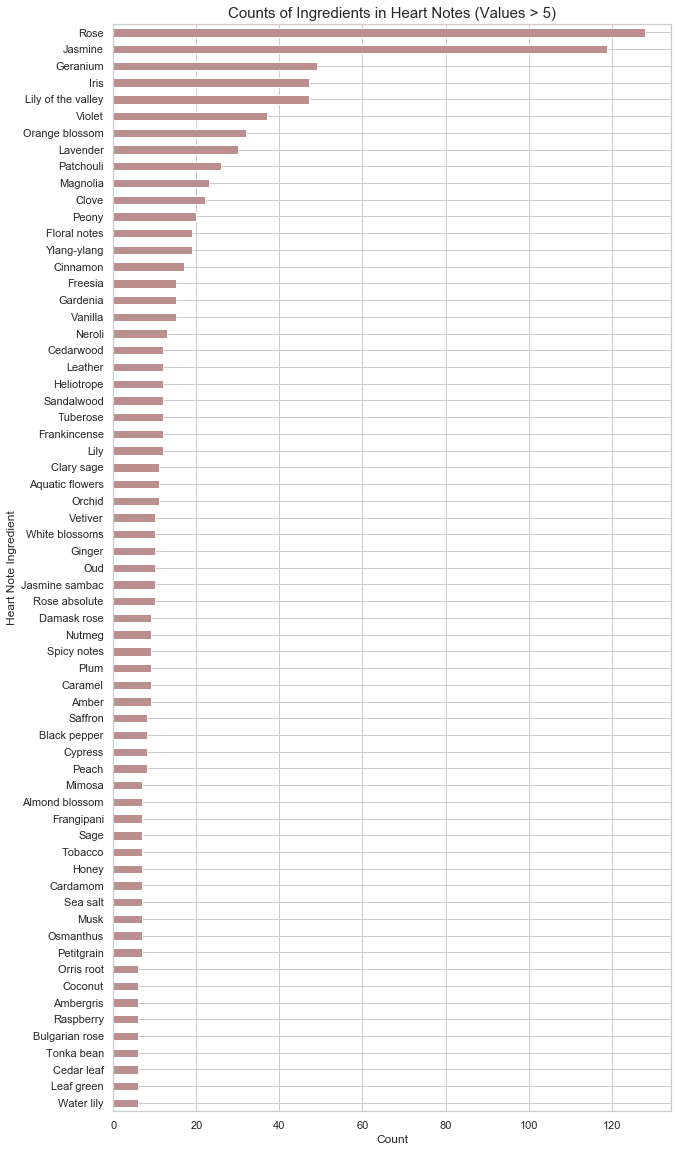

In [153]:
heart_ingredient_series_filtered = heart_ingredient_series_sorted[heart_ingredient_series_sorted > 5]
heart_ingredient_series_filtered.plot(kind = 'barh', figsize = (10, 20), color = 'rosybrown')

plt.xlabel('Count')
plt.ylabel('Heart Note Ingredient')
plt.title('Counts of Ingredients in Heart Notes (Values > 5)', fontsize = 15)
plt.show()

In [131]:
# Iterating over rows and counting the occurrences of ingredients listed in the 'BaseNotes' column 
base_ingredient_counts = {}

for index, row in df.iterrows():
    base_notes_list = row['BaseNotes']
    if isinstance(base_notes_list, list):
        for ingredient in base_notes_list:
            base_ingredient_counts[ingredient] = base_ingredient_counts.get(ingredient, 0) + 1
    elif isinstance(base_notes_list, str):
        ingredients = [x.strip() for x in base_notes_list.split(',')]
        for ingredient in ingredients:
            base_ingredient_counts[ingredient] = base_ingredient_counts.get(ingredient, 0) + 1

base_ingredient_series = pd.Series(base_ingredient_counts, dtype = int)
print(base_ingredient_series)

['Sandalwood']      2
['Amber'          135
'Cedarwood'        37
'Frankincense'      9
'Labdanum'         24
                 ... 
'Atlas cedar'       1
'Suede']            1
'Irish moss'        1
['Cinnamon'         1
'Ginger'            1
Length: 363, dtype: int32


In [133]:
# Cleaning the index values and aggregating the counts of ingredients
base_ingredient_counts = {}

for ingredient, count in base_ingredient_series.items():
    base_ingredient_cleaned = ingredient.replace('[', '').replace(']', '').replace("'", "")
    if base_ingredient_cleaned in base_ingredient_counts:
        base_ingredient_counts[base_ingredient_cleaned] += count
    else:
        base_ingredient_counts[base_ingredient_cleaned] = count
base_ingredient_series_cleaned = pd.Series(base_ingredient_counts, dtype = int)
print(base_ingredient_series_cleaned)

Sandalwood      143
Amber           140
Cedarwood        81
Frankincense     19
Labdanum         30
               ... 
Sunflower         1
Suede             1
Irish moss        1
Cinnamon          1
Ginger            1
Length: 262, dtype: int32


In [138]:
# Out of 509 perfumes that we have analysed 145 included vanila as a base note, share of vanila 28.48%
base_ingredient_series_sorted = base_ingredient_series_cleaned.sort_values(ascending = True)
print(base_ingredient_series_sorted)

Ginger                    1
Violet leaf absolute      1
Macaron                   1
Solar note                1
Beeswax                   1
                       ... 
Patchouli               108
Amber                   140
Sandalwood              143
Vanilla                 145
Musk                    210
Length: 262, dtype: int32


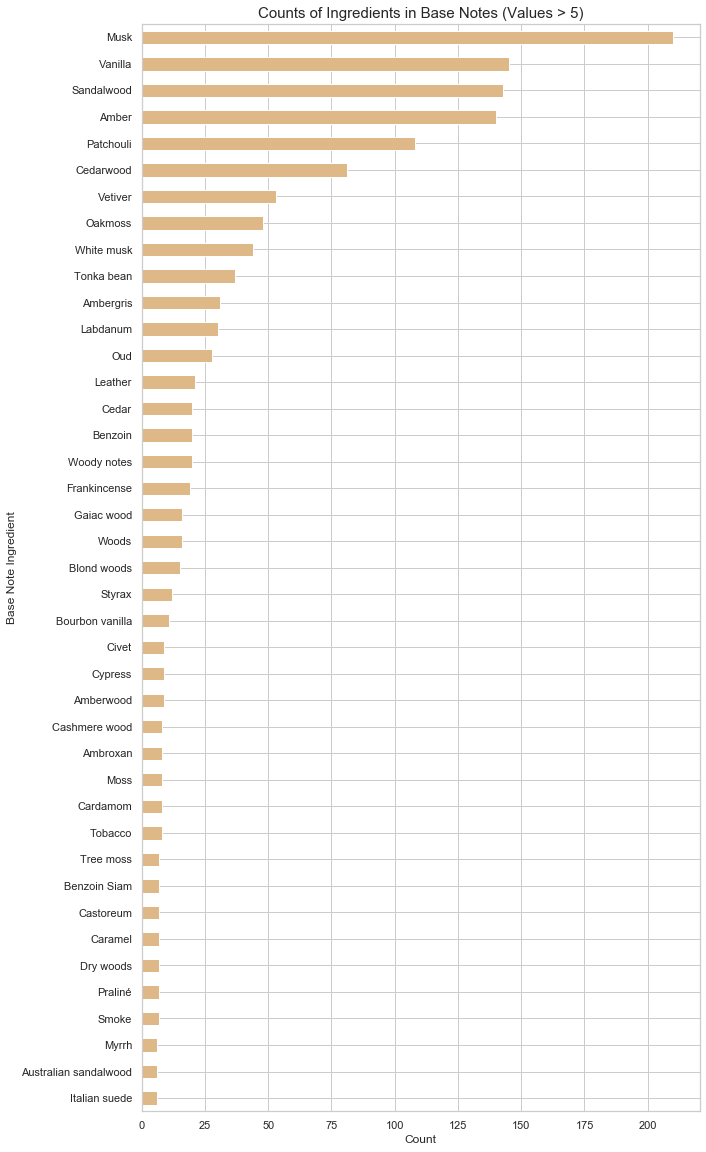

In [ ]:
base_ingredient_series_filtered = base_ingredient_series_sorted[base_ingredient_series_sorted > 5]

base_ingredient_series_filtered.plot(kind = 'barh', figsize = (10, 20), color = 'burlywood')
plt.xlabel('Count')
plt.ylabel('Base Note Ingredient')
plt.title('Counts of Ingredients in Base Notes (Values > 5)', fontsize = 15)
plt.show()